# Polynomial Regression

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
data = pd.read_csv('./Position_Salaries.csv')

In [4]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
x = data.Level.values
y = data.Salary.values

#O professor faz assim, mas eu prefiro fazer do meu jeito
# Vou dar um Reshape dps

# x = data.iloc[:,1:2].values
# y = data.iloc[:,2:3].values

In [6]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Training the Linear Regression model on the whole dataset

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#Nao tava indo, então eu fiz como o erro mandou, dei um reshape e foi
# x = x.reshape(1,-1)
# y = y.reshape(1,-1)
#Fiz o reshape com data.shape[0] pois acha o numero de linhas do datafrane
# e com 1 coluna

x = x.reshape(data.shape[0],1)
y = y.reshape(data.shape[0],1)
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Aqui em degree escolhemos o expoente do Xˆn no caso vai ficar xˆ2
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

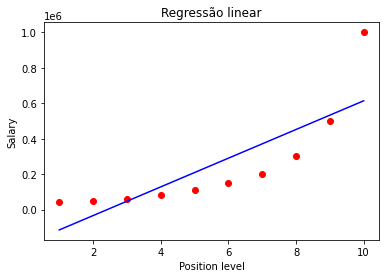

In [10]:
plt.scatter(x,y, color='red')
plt.plot(x,lr.predict(x), color='blue')
plt.title('Regressão linear')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

Text(0, 0.5, 'Salary')

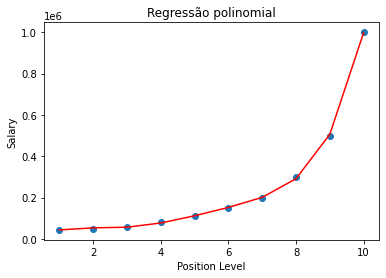

In [11]:
plt.scatter(x,y)

# a predição precisa ser aplicada na regressão linear transformada 

plt.plot(x,lin_reg.predict(x_poly),color = 'red')
plt.title('Regressão polinomial')
plt.xlabel('Position Level')
plt.ylabel('Salary')

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

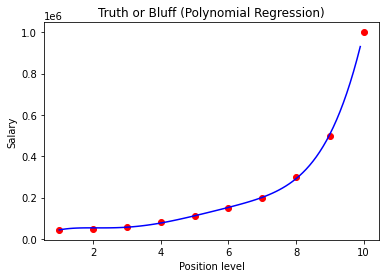

In [12]:
X = x
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [13]:
#Precisamos colocar um par de [] pois cada um corresponde a uma dimensão
#[[]] o externo é o número de colunas e o interno é o número de linhas
lr.predict([[1]])

array([[-114454.54545455]])

## Predicting a new result with Polynomial Regression

In [14]:
#Precisamos do fit transform para transformar o array em uma regressão polinomial
lin_reg.predict(poly_reg.fit_transform([[6.5]]))

array([[174878.07765172]])